In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, accuracy_score, roc_curve,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold

In [369]:
df = pd.read_csv('/content/drive/MyDrive/project/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [370]:
df.shape

(614, 13)

In [371]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [372]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [373]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [374]:
df.Gender.value_counts(dropna=False)


Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

<ipython-input-375-4ff52469cdea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="rocket")


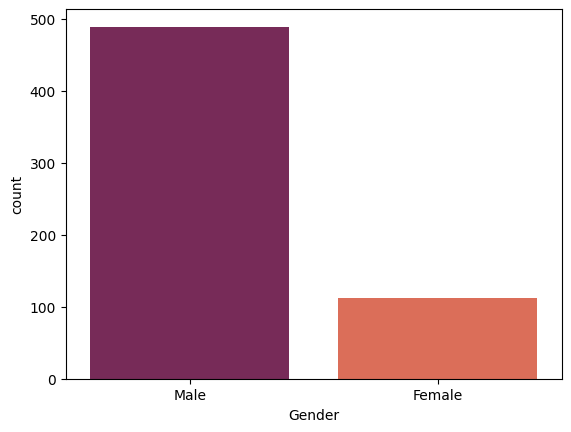

In [375]:
sns.countplot(x="Gender", data=df, palette="rocket")
plt.show()

In [376]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [377]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

<ipython-input-378-7611adda04cc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="mako")


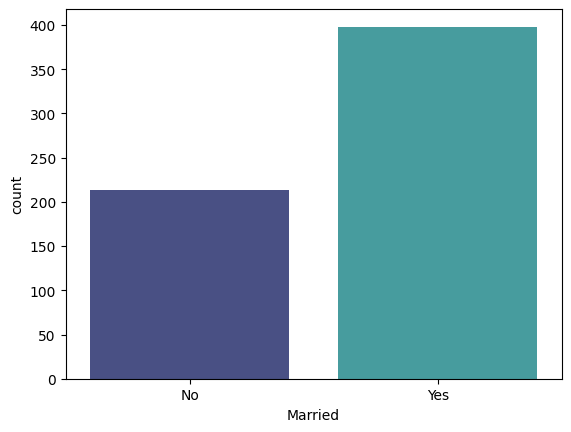

In [378]:
sns.countplot(x="Married", data=df, palette="mako")
plt.show()

In [379]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [380]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<ipython-input-381-3bcc7ebf2a94>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="mako")


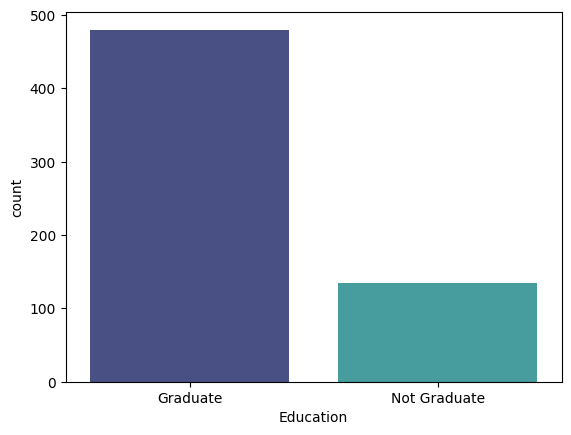

In [381]:
sns.countplot(x="Education", data=df, palette="mako")
plt.show()

In [382]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of Graduates: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of NotGraduates: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of Graduates: 78.18%
Percentage of NotGraduates: 21.82%
Missing values percentage: 0.00%


In [383]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

<ipython-input-384-d78aef66b260>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="magma")


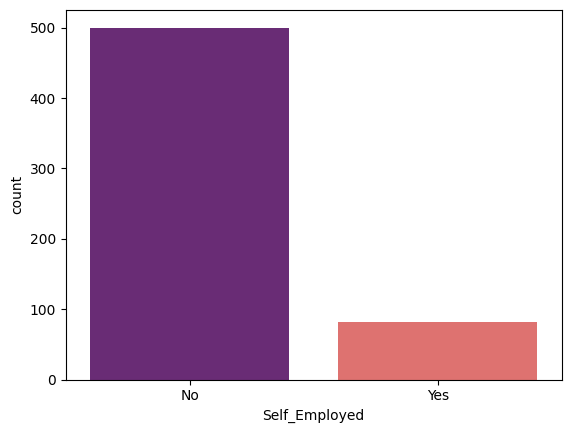

In [384]:
sns.countplot(x="Self_Employed", data=df, palette="magma")
plt.show()

In [385]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


In [386]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

<ipython-input-387-3566c6337a91>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="Spectral")


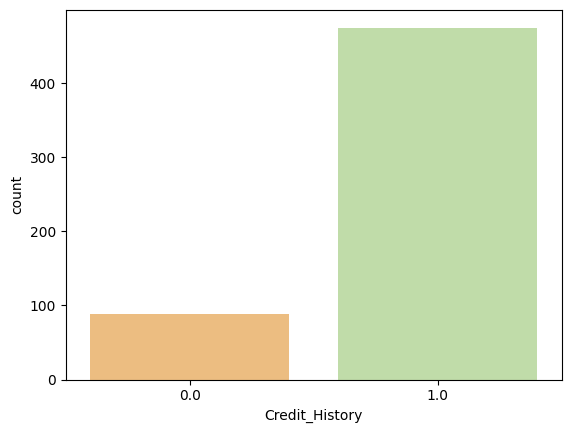

In [387]:
sns.countplot(x="Credit_History", data=df, palette="Spectral")
plt.show()

In [388]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [389]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<ipython-input-390-9d80339f50db>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="mako")


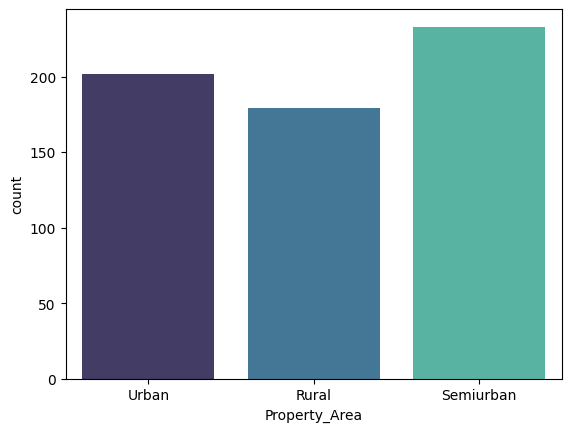

In [390]:
sns.countplot(x="Property_Area", data=df, palette="mako")
plt.show()

In [391]:
countUrban = len(df[df.Property_Area == 'Urban'])
countNotRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNan = len(df[df.Property_Area.isnull()])

print("Percentage of Urban Applicants: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural applicant: {:.2f}%".format((countNotRural / (len(df.Property_Area))*100)))
print("Percentage of Semi urban applicant: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban Applicants: 32.90%
Percentage of Rural applicant: 29.15%
Percentage of Semi urban applicant: 37.95%
Missing values percentage: 8.14%


In [392]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

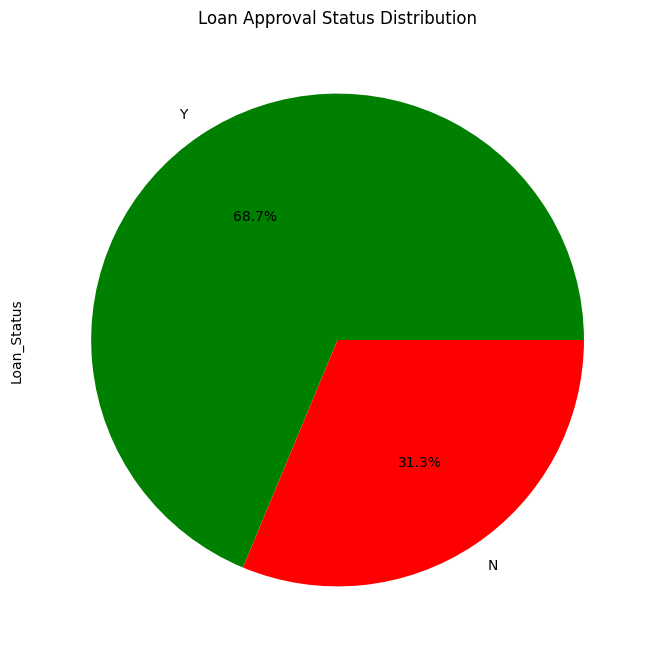

In [393]:
plt.figure(figsize=(8, 8))
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green','red'])
plt.title('Loan Approval Status Distribution')
plt.show()


In [394]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [395]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [396]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


In [397]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [398]:
df.duplicated().sum()

0

In [399]:
def bar_chart(col):
    Approved = df[df["Loan_Status"]=="Y"][col].value_counts()
    Disapproved = df[df["Loan_Status"]=="N"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    df1.plot(kind="bar")
    plt.title(f'Loan Approval Status based on {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

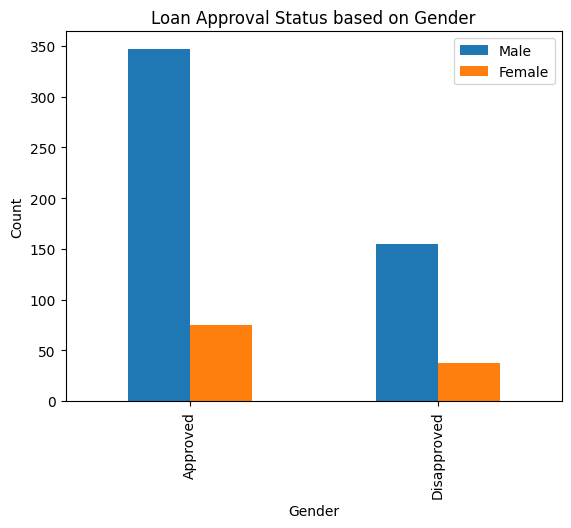

In [400]:
bar_chart("Gender")

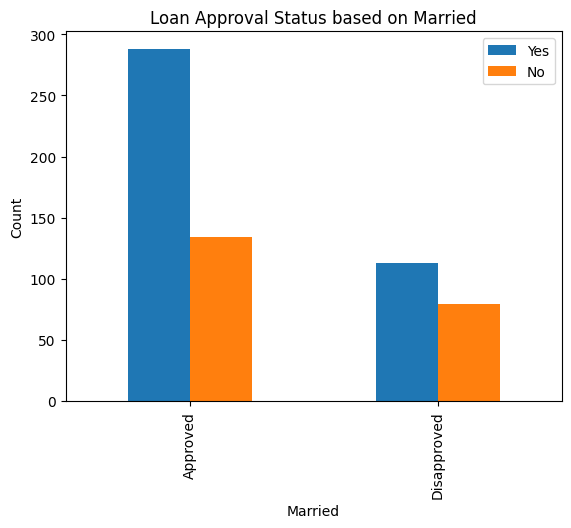

In [401]:
bar_chart("Married")

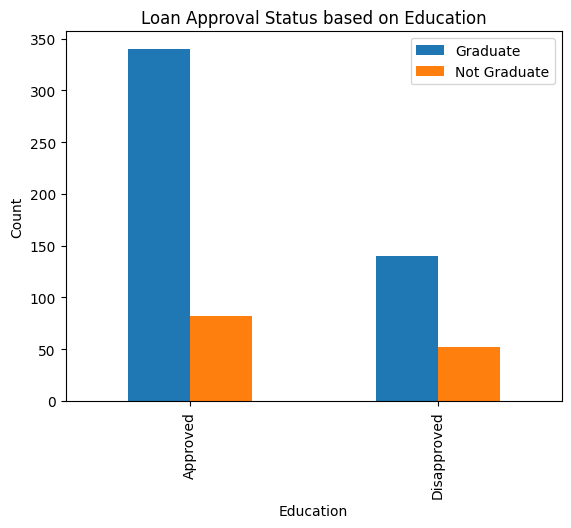

In [402]:
bar_chart("Education")

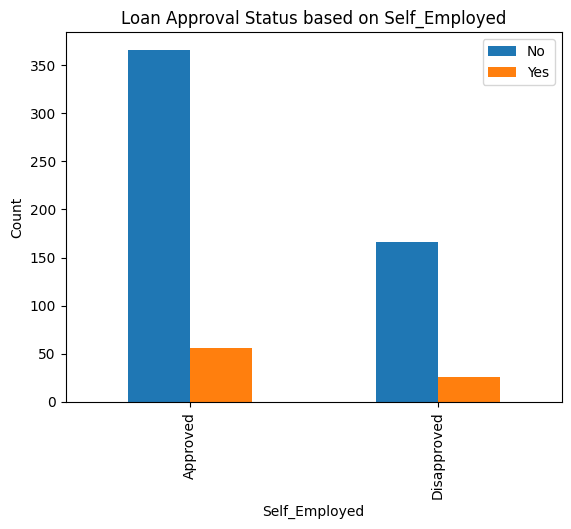

In [403]:
bar_chart("Self_Employed")

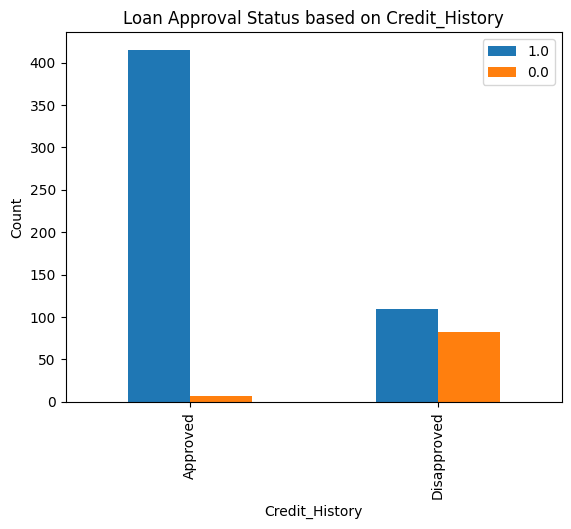

In [404]:
bar_chart("Credit_History")

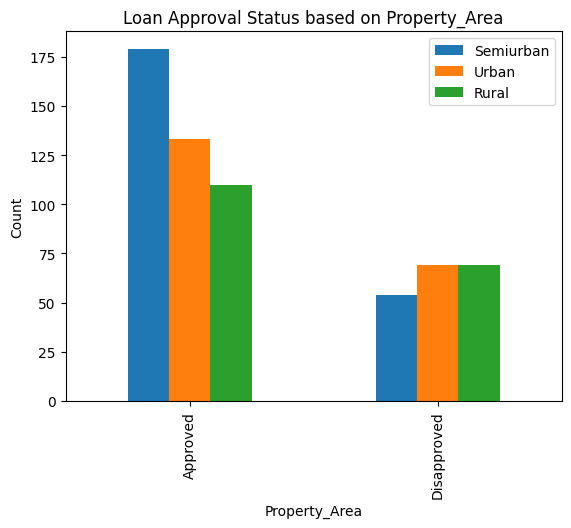

In [405]:
bar_chart("Property_Area")

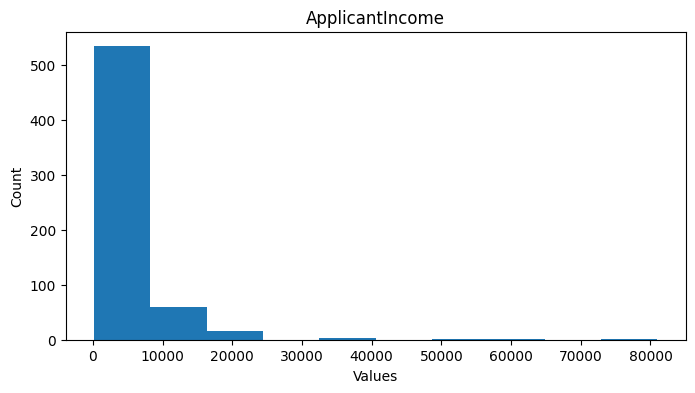

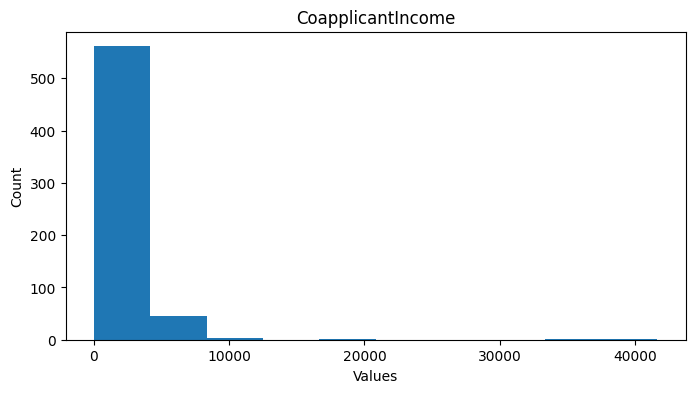

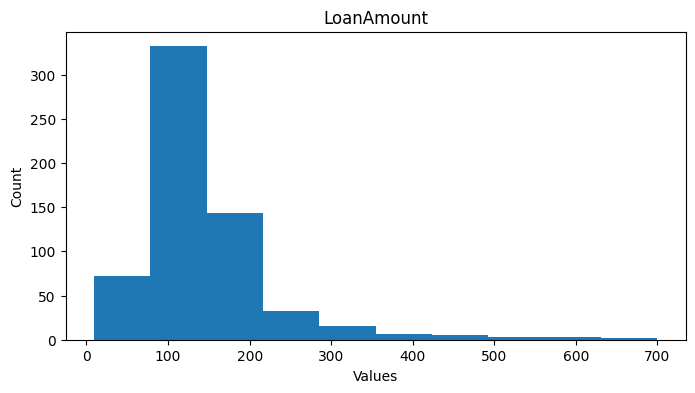

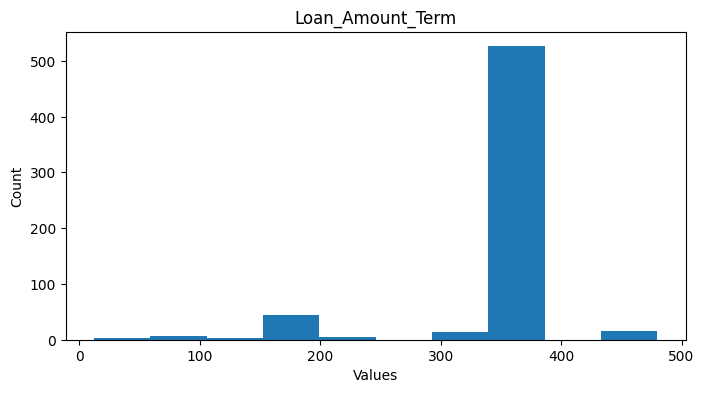

In [406]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.show()

In [407]:
df = df.drop(['Loan_ID'], axis = 1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [408]:
df = pd.get_dummies(df)
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)
print(df.head())
df.shape

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
0             1.0       1        0             1             0             0   
1             1.0       1        1             0             1             0   
2             1.0       1        1             1             0             0   
3             1.0       1        1             1             0             0   
4             1.0       1        0             1             0             0   

   Dependents_3+  Education  Self_Employed  Property_Area_Rural  \
0              0         

(614, 17)

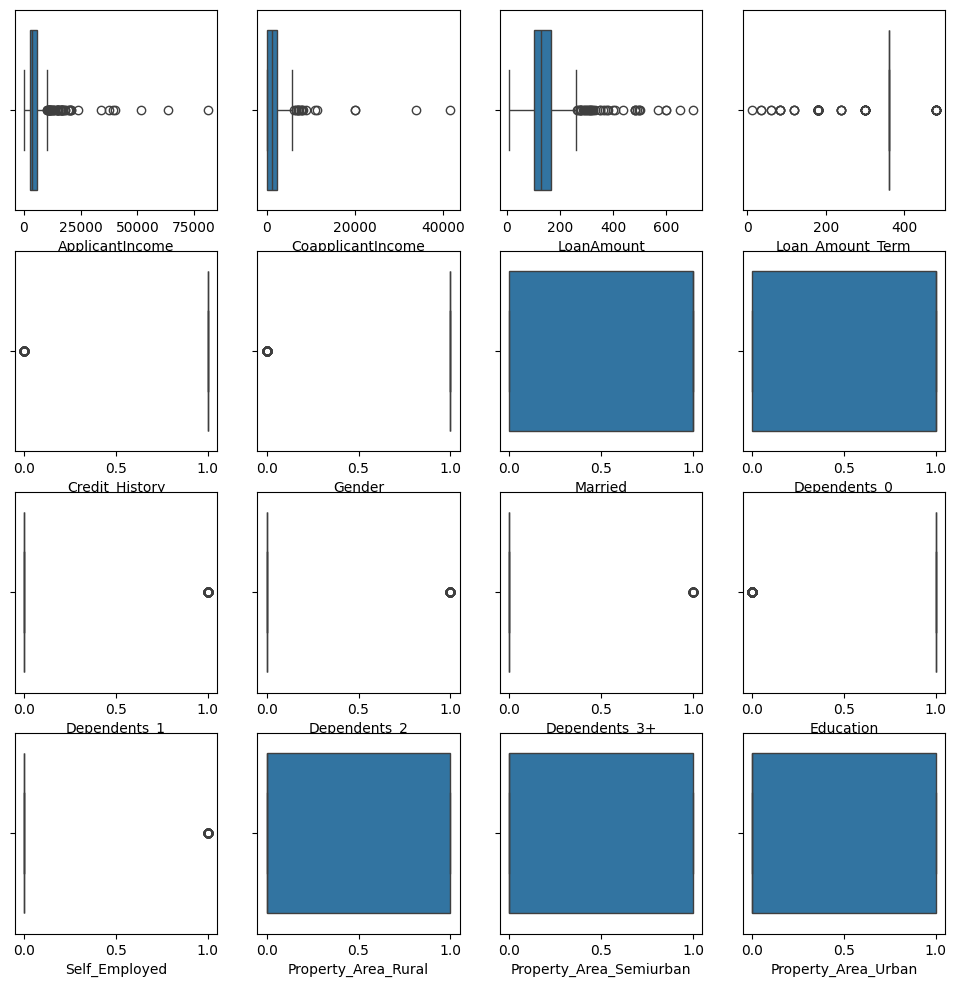

In [409]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married','Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Education','Self_Employed', 'Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban']):
  plt.subplot(4,4,i+1)
  sns.boxplot(x=col,data=df)
plt.show()

In [410]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
aaf=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(aaf.head())
print(aaf.shape)
df=aaf
ddf=df['Loan_Status']

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0  146.412162             360.0   
4              6000                0.0  141.000000             360.0   
13             1853             2840.0  114.000000             360.0   
15             4950                0.0  125.000000             360.0   
19             2600             3500.0  115.000000             360.0   

    Credit_History  Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
0              1.0       1        0             1             0             0   
4              1.0       1        0             1             0             0   
13             1.0       1        0             1             0             0   
15             1.0       1        0             1             0             0   
19             1.0       1        1             1             0             0   

    Dependents_3+  Education  Self_Employed  Property_Area_Rural  \
0           

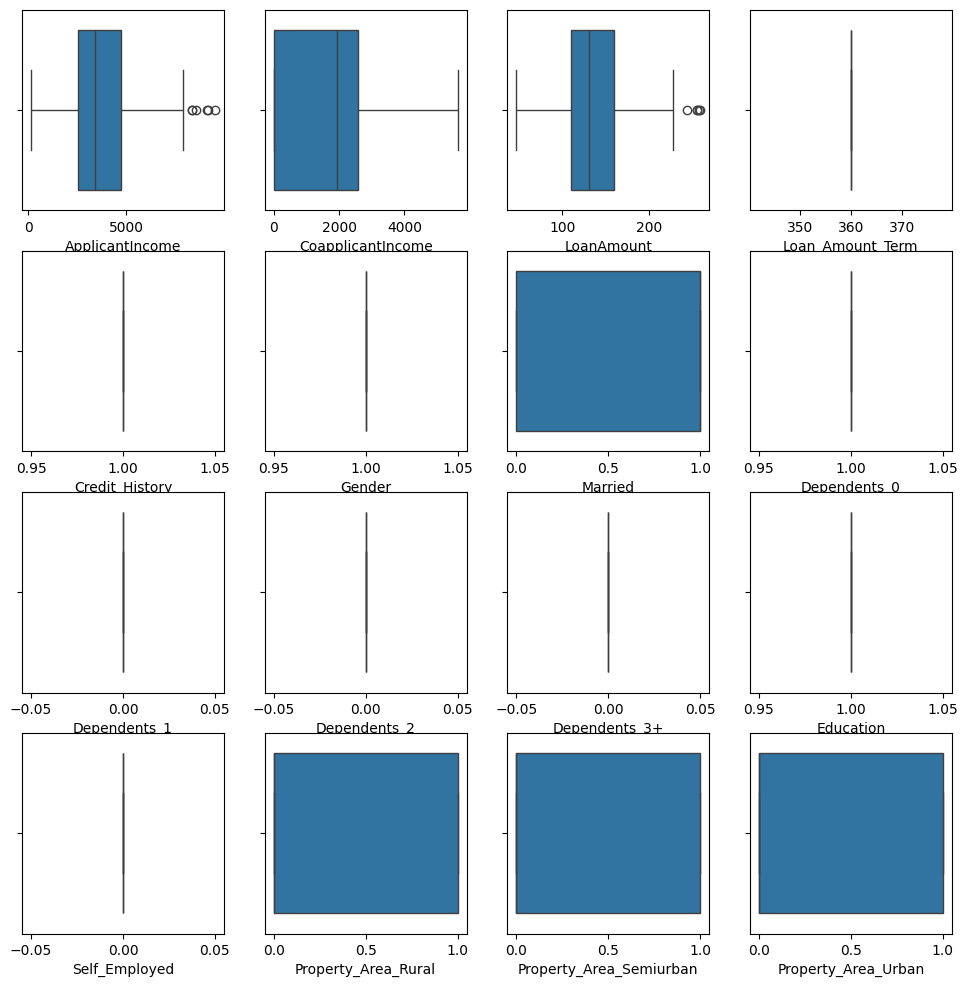

In [411]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married','Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Education','Self_Employed', 'Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban']):
  plt.subplot(4,4,i+1)
  sns.boxplot(x=col,data=df)
plt.show()

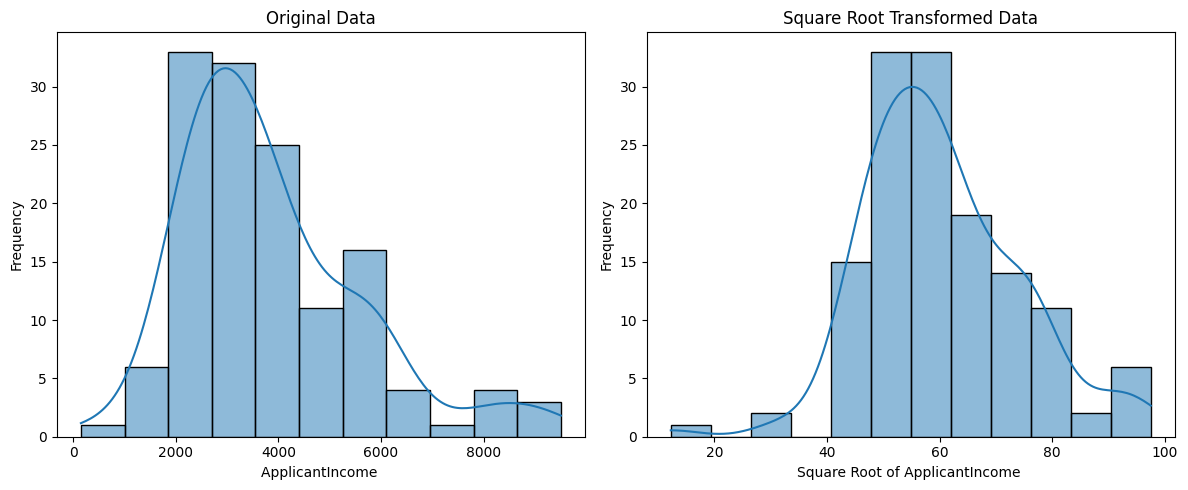

In [412]:
column_to_transform = 'ApplicantIncome '


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['ApplicantIncome'], kde=True, ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_xlabel(column_to_transform)
axes[0].set_ylabel('Frequency')


df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.columns

sns.histplot(df['ApplicantIncome'], kde=True, ax=axes[1])
axes[1].set_title('Square Root Transformed Data')
axes[1].set_xlabel('Square Root of ' + column_to_transform)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


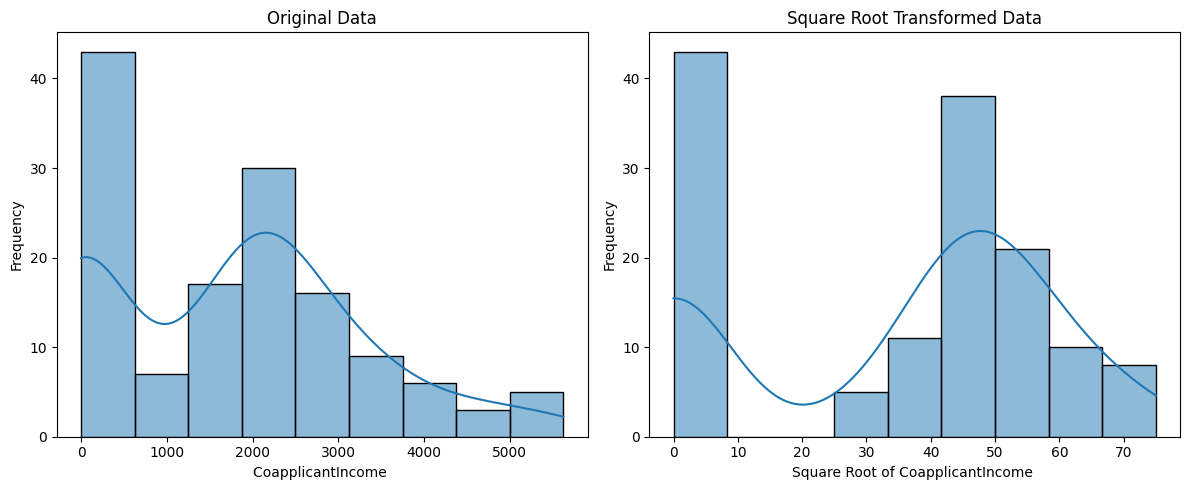

In [413]:
column_to_transform = 'CoapplicantIncome '


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['CoapplicantIncome'], kde=True, ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_xlabel(column_to_transform)
axes[0].set_ylabel('Frequency')


df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.columns

sns.histplot(df['CoapplicantIncome'], kde=True, ax=axes[1])
axes[1].set_title('Square Root Transformed Data')
axes[1].set_xlabel('Square Root of ' + column_to_transform)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


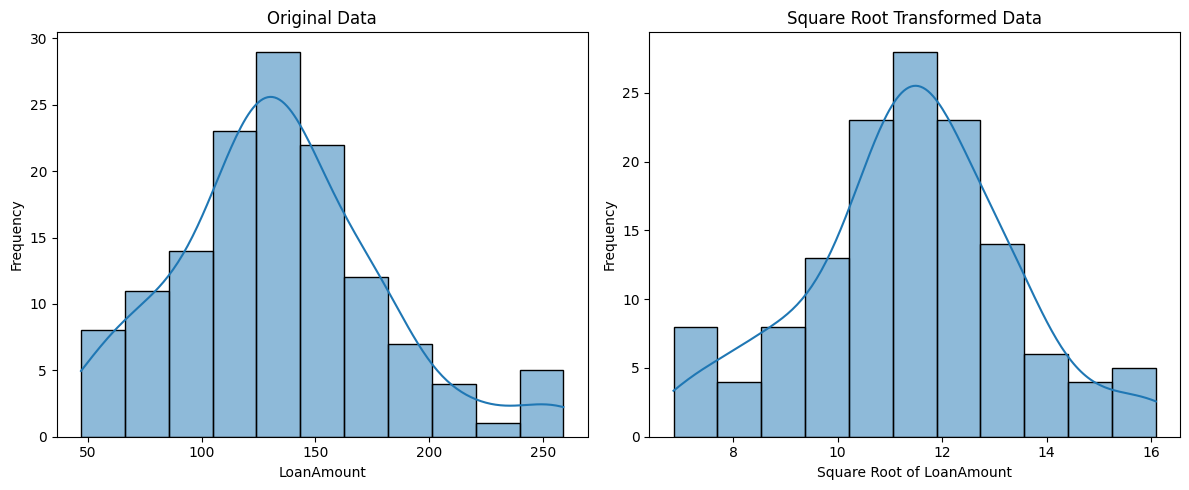

In [414]:
column_to_transform = 'LoanAmount'


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['LoanAmount'], kde=True, ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_xlabel(column_to_transform)
axes[0].set_ylabel('Frequency')


df.LoanAmount = np.sqrt(df.LoanAmount)
df.columns

sns.histplot(df['LoanAmount'], kde=True, ax=axes[1])
axes[1].set_title('Square Root Transformed Data')
axes[1].set_xlabel('Square Root of ' + column_to_transform)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [415]:
print(df.head())

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         76.478755           0.000000   12.100089             360.0   
4         77.459667           0.000000   11.874342             360.0   
13        43.046487          53.291650   10.677078             360.0   
15        70.356236           0.000000   11.180340             360.0   
19        50.990195          59.160798   10.723805             360.0   

    Credit_History  Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
0              1.0       1        0             1             0             0   
4              1.0       1        0             1             0             0   
13             1.0       1        0             1             0             0   
15             1.0       1        0             1             0             0   
19             1.0       1        1             1             0             0   

    Dependents_3+  Education  Self_Employed  Property_Area_Rural  \
0           

<Axes: title={'center': 'Correlation of variables'}>

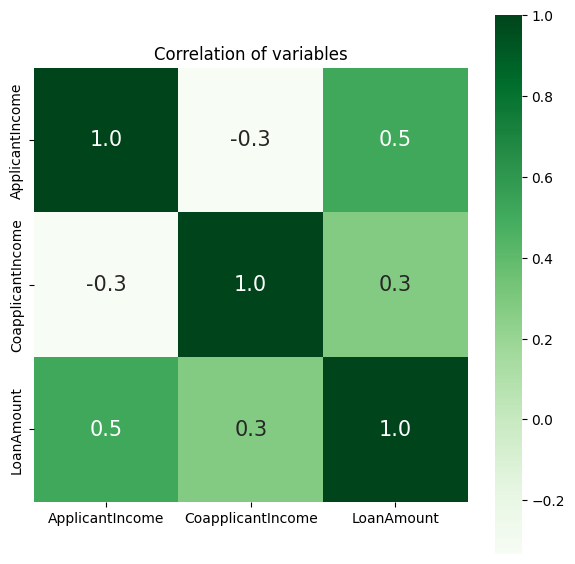

In [416]:
plt.figure(figsize=(7,7))
plt.title('Correlation of variables')
corr = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True, cmap='Greens', cbar=True, square= True, fmt='.1f', annot_kws={'size':15})

In [417]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
rfe = RFE(estimator=logreg_model, n_features_to_select=6)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)
print("Selected Features:", selected_features)


Selected Features: Index(['ApplicantIncome', 'LoanAmount', 'Married', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [418]:
df=df[selected_features]
df.shape

(136, 6)

In [419]:
X = df
y = ddf
print(X.shape,y.shape)


(136, 6) (136,)


In [420]:
XX=X
yy=y

In [421]:
pip install imblearn

In [422]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X,y)


In [423]:
print(X,y)

     ApplicantIncome  LoanAmount  Married  Property_Area_Rural  \
0          76.478755   12.100089        0                    0   
1          77.459667   11.874342        0                    0   
2          43.046487   10.677078        0                    1   
3          70.356236   11.180340        0                    0   
4          50.990195   10.723805        1                    0   
..               ...         ...      ...                  ...   
219        59.921217    9.050548        0                    0   
220        68.126388   11.922901        0                    0   
221        68.883564   12.186085        0                    0   
222        48.252488    8.567104        0                    0   
223        76.267948   15.437553        1                    0   

     Property_Area_Semiurban  Property_Area_Urban  
0                          0                    1  
1                          0                    1  
2                          0                    0  

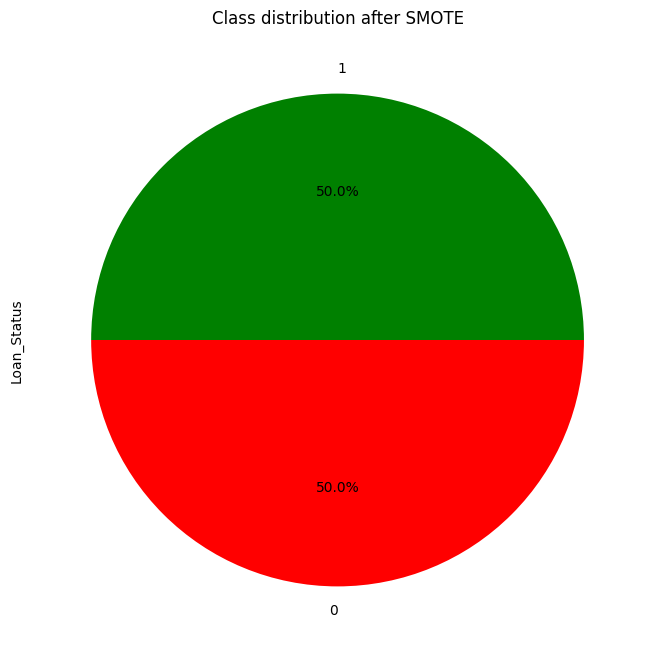

In [424]:
plt.figure(figsize=(8, 8))
y.value_counts().plot.pie(autopct='%1.1f%%', colors=['green','red'])
plt.title('Class distribution after SMOTE')
plt.show()


In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (179, 6) (179,)
Test set: (45, 6) (45,)


In [426]:
Training_Accuracy_L=[0]*6
Test_Accuracy_L=[0]*6
Sensitivity_L=[0]*6
Specificity_L=[0]*6
F1Score_L=[0]*6
Precision_L=[0]*6
Negative_Predictive_Value_L=[0]*6
False_Negative_Rate_L=[0]*6
False_Positive_Rate_L=[0]*6
False_Discovery_Rate_L=[0]*6
False_Omission_Rate_L=[0]*6
cv_accuracy_L=[0]*6

In [427]:
import math


def rounder(n):
  try:
    return math.ceil(n * 1000) / 1000
  except:
    return n

def fun(model,name,num_folds,index):
  test_pred = model.predict(X_test)
  train_pred = model.predict(X_train)

  train_acc=rounder(accuracy_score(y_train,train_pred)*100)
  test_acc=rounder(accuracy_score(y_test,test_pred)*100)

  Training_Accuracy_L[index]=train_acc
  Test_Accuracy_L[index]=test_acc

  print("\nTraining Accuracy:", train_acc)
  print("\nTesting Accuracy:",test_acc)

  print(classification_report(y_test,test_pred))
  test_conf_matrix = confusion_matrix(y_test,test_pred)
  plt.figure(figsize=(4, 4))
  sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False)
  t=name+' Confusion Matrix - Test Set'
  plt.title(t)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  tn, fp,fn,tp = test_conf_matrix.ravel()

  Sensitivity=rounder((tp) / (tp + fn))
  Sensitivity_L[index]=Sensitivity

  Specificity=rounder((tn) / (tn + fp))
  Specificity_L[index]=Specificity

  F1Score=rounder( (2 * tp) / (2 * tp+ fp + fn))
  F1Score_L[index]=F1Score

  Precision=rounder((tp) / (tp +fp))
  Precision_L[index]=Precision

  Negative_Predictive_Value= rounder((tn) / (tn + fn))
  Negative_Predictive_Value_L[index]=Negative_Predictive_Value

  False_Negative_Rate=rounder((fn) / (fn + tp))
  False_Negative_Rate_L[index]=False_Negative_Rate

  False_Positive_Rate=rounder((fp) / (fp + tn))
  False_Positive_Rate_L[index]=False_Positive_Rate

  False_Discovery_Rate=rounder((fp) / (fp + tp))
  False_Discovery_Rate_L[index]=False_Discovery_Rate

  False_Omission_Rate=rounder((fn) / (fn+ tn))
  False_Omission_Rate_L[index]=False_Omission_Rate


  print('Sensitivity:', Sensitivity)
  print('Specificity:', Specificity)
  print('F1 Score:', F1Score)
  print('Precision:',Precision)
  print('Negative Predictive Value:', Negative_Predictive_Value)
  print('False Negative Rate:',False_Negative_Rate)
  print('False Positive Rate:',False_Positive_Rate)
  print('False Discovery Rate:',False_Discovery_Rate)
  print('False Omission Rate:', False_Omission_Rate)

  test_probabilities =model.predict_proba(X_test)[:, 1]
  auc_score = roc_auc_score(y_test,test_probabilities)

  fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=''+name+'(AUC = {:.2f})'.format(auc_score))
  plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - '+name)
  plt.legend()
  plt.show()

  kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
  print(f"\n{num_folds}-Fold Cross-Validation Scores:")
  print(cv_scores)

  print(f"\nCross-Validation Accuracy Score: {max(cv_scores) * 100:.2f}%")
  cv_accuracy_L[index]=max(cv_scores)*100



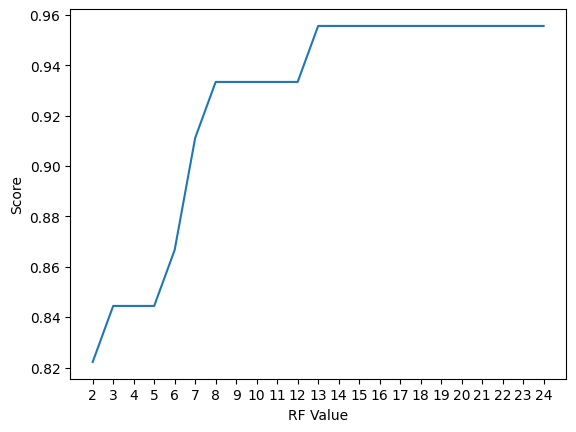

Random Forest Accuracy:  95.56%

Training Accuracy: 98.325

Testing Accuracy: 95.556
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        25

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



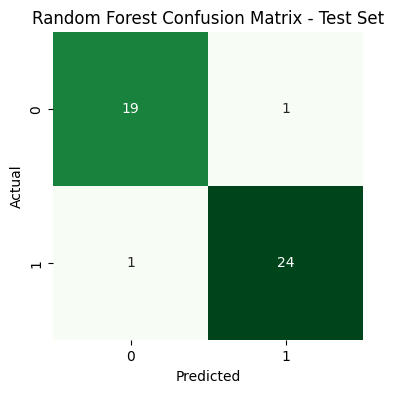

Sensitivity: 0.96
Specificity: 0.95
F1 Score: 0.96
Precision: 0.96
Negative Predictive Value: 0.95
False Negative Rate: 0.04
False Positive Rate: 0.05
False Discovery Rate: 0.04
False Omission Rate: 0.05


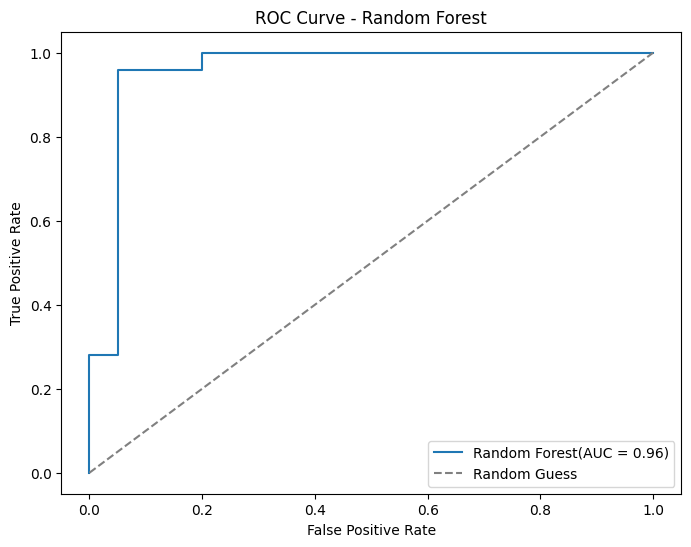


14-Fold Cross-Validation Scores:
[0.92307692 0.92307692 0.84615385 0.84615385 0.69230769 0.84615385
 0.84615385 0.84615385 0.84615385 0.76923077 0.69230769 0.83333333
 0.66666667 0.83333333]

Cross-Validation Accuracy Score: 92.31%


In [428]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))
fun(RFclassifier,'Random Forest',14,0)


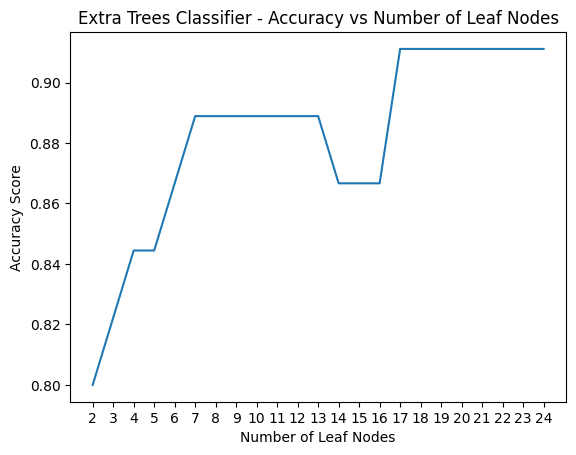

Extra Trees Classifier Accuracy: 91.11%

Training Accuracy: 92.179

Testing Accuracy: 91.112
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.89      0.96      0.92        25

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



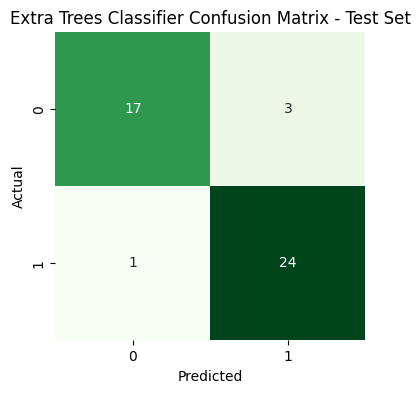

Sensitivity: 0.96
Specificity: 0.85
F1 Score: 0.924
Precision: 0.889
Negative Predictive Value: 0.945
False Negative Rate: 0.04
False Positive Rate: 0.15
False Discovery Rate: 0.112
False Omission Rate: 0.056


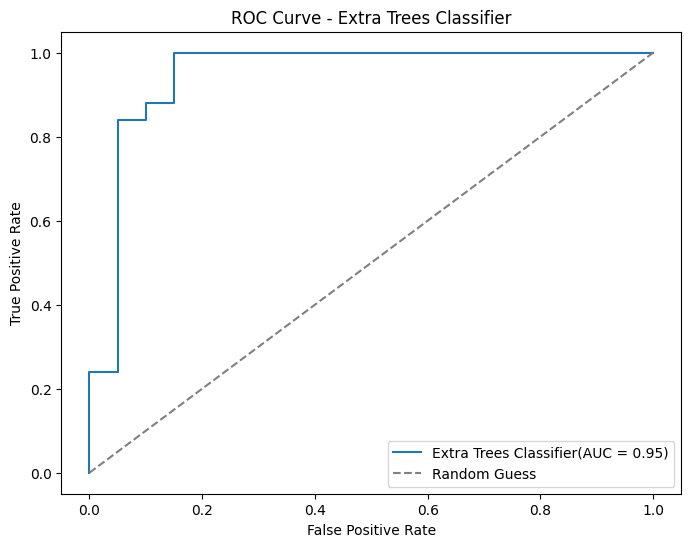


6-Fold Cross-Validation Scores:
[0.9        0.8        0.86666667 0.83333333 0.7        0.75862069]

Cross-Validation Accuracy Score: 90.00%


In [429]:
from sklearn.ensemble import ExtraTreesClassifier
scoreListET=[]
for i in range(2, 25):
    ETclassifier = ExtraTreesClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    ETclassifier.fit(X_train, y_train)
    scoreListET.append(ETclassifier.score(X_test, y_test))

plt.plot(range(2, 25), scoreListET)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Extra Trees Classifier - Accuracy vs Number of Leaf Nodes")
plt.show()

ETAcc = max(scoreListET)
print("Extra Trees Classifier Accuracy: {:.2f}%".format(ETAcc * 100))
fun(ETclassifier,'Extra Trees Classifier',6,1)

LR accuracy: 82.22%


Training Accuracy: 79.33

Testing Accuracy: 82.223
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.90      0.76      0.83        25

    accuracy                           0.82        45
   macro avg       0.83      0.83      0.82        45
weighted avg       0.84      0.82      0.82        45



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


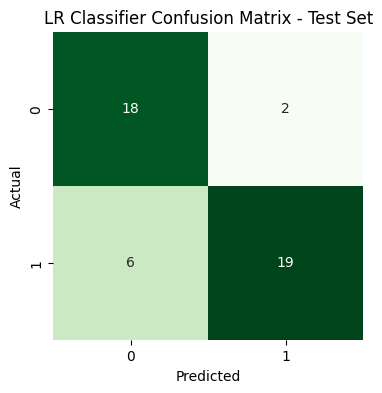

Sensitivity: 0.76
Specificity: 0.9
F1 Score: 0.827
Precision: 0.905
Negative Predictive Value: 0.75
False Negative Rate: 0.24
False Positive Rate: 0.1
False Discovery Rate: 0.096
False Omission Rate: 0.25


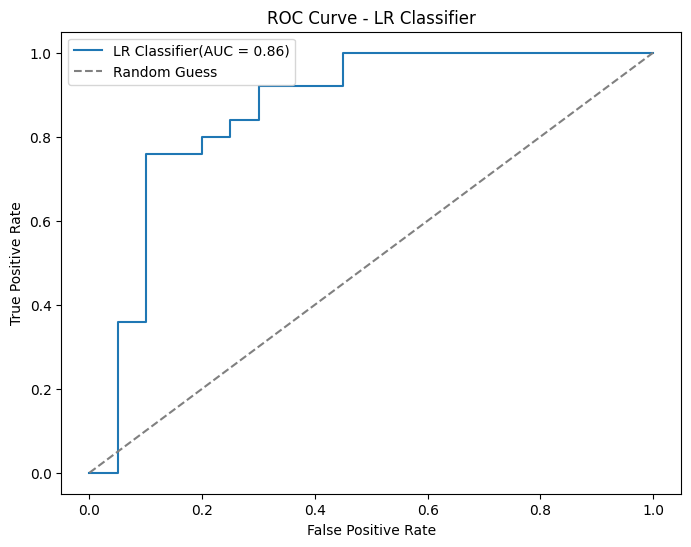


5-Fold Cross-Validation Scores:
[0.91666667 0.80555556 0.91666667 0.61111111 0.68571429]

Cross-Validation Accuracy Score: 91.67%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [430]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%\n'.format(LRAcc*100))
fun(LRclassifier,'LR Classifier',5,2)

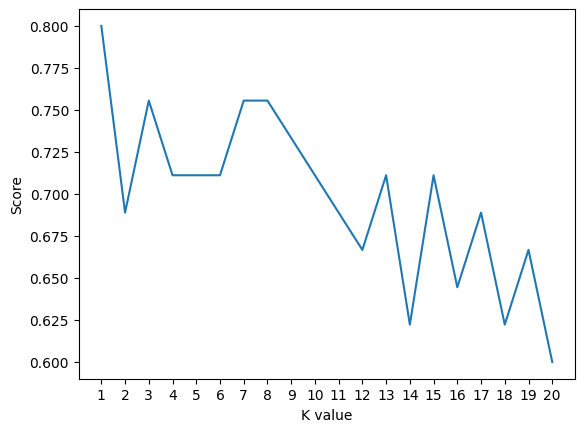

KNN best accuracy: 80.00%

Training Accuracy: 70.95

Testing Accuracy: 60.0
              precision    recall  f1-score   support

           0       0.53      0.85      0.65        20
           1       0.77      0.40      0.53        25

    accuracy                           0.60        45
   macro avg       0.65      0.62      0.59        45
weighted avg       0.66      0.60      0.58        45



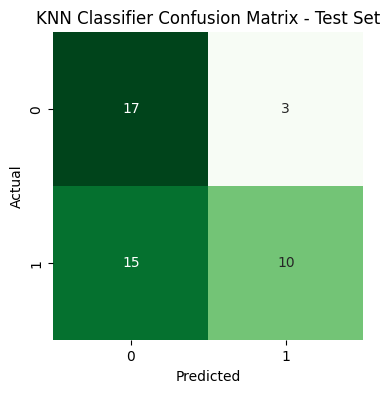

Sensitivity: 0.4
Specificity: 0.85
F1 Score: 0.527
Precision: 0.77
Negative Predictive Value: 0.532
False Negative Rate: 0.6
False Positive Rate: 0.15
False Discovery Rate: 0.231
False Omission Rate: 0.469


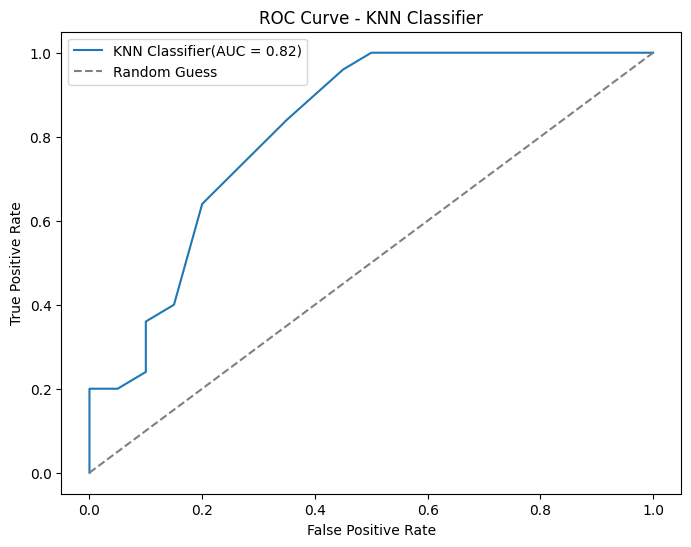


8-Fold Cross-Validation Scores:
[0.56521739 0.7826087  0.56521739 0.54545455 0.90909091 0.90909091
 0.40909091 0.54545455]

Cross-Validation Accuracy Score: 90.91%


In [431]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))
fun(KNclassifier,'KNN Classifier',8,3)

In [432]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):


    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8       , 0.68888889, 0.75555556, 0.71111111, 0.71111111,
       0.71111111, 0.75555556, 0.75555556, 0.73333333])

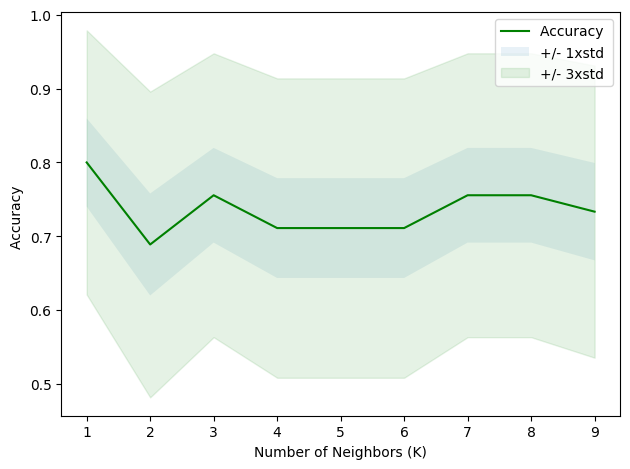

In [433]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [434]:
print( "The best accuracy was with", mean_acc.max(), "which was K=", mean_acc.argmax()+1)

The best accuracy was with 0.8 which was K= 1


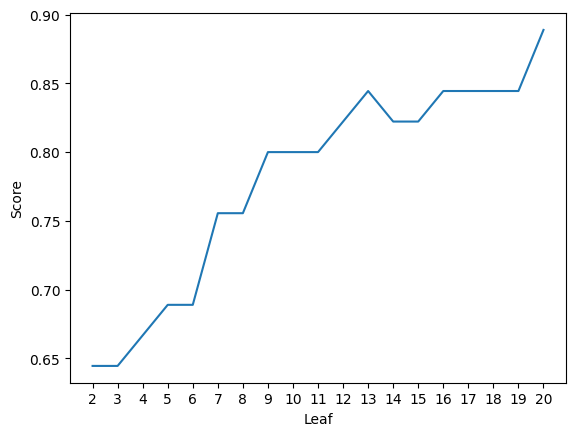

Decision Tree Accuracy: 88.89%

Training Accuracy: 93.855

Testing Accuracy: 88.889
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.88      0.92      0.90        25

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



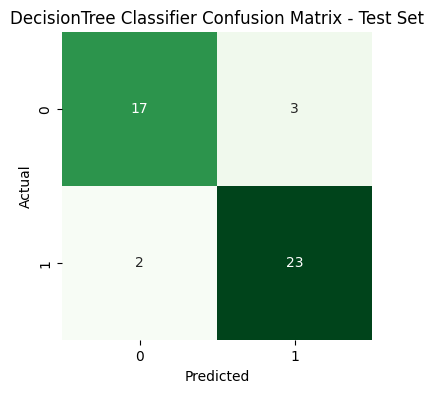

Sensitivity: 0.92
Specificity: 0.85
F1 Score: 0.902
Precision: 0.885
Negative Predictive Value: 0.895
False Negative Rate: 0.08
False Positive Rate: 0.15
False Discovery Rate: 0.116
False Omission Rate: 0.106


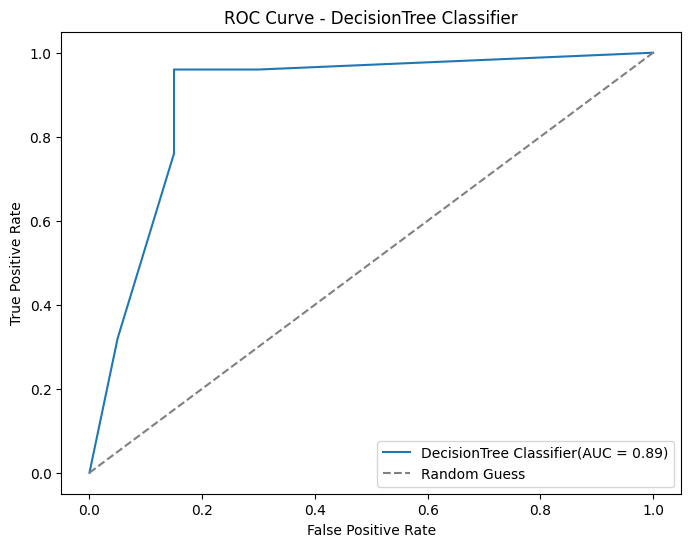


6-Fold Cross-Validation Scores:
[0.76666667 0.8        0.8        0.66666667 0.7        0.75862069]

Cross-Validation Accuracy Score: 80.00%


In [438]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))
fun(DTclassifier,'DecisionTree Classifier',6,4)

Gradient Boosting accuracy: 93.33%

Training Accuracy: 100.0

Testing Accuracy: 93.334
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.96      0.92      0.94        25

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.93      0.93      0.93        45



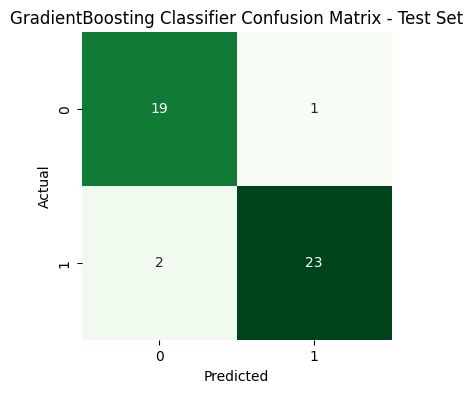

Sensitivity: 0.92
Specificity: 0.95
F1 Score: 0.939
Precision: 0.959
Negative Predictive Value: 0.905
False Negative Rate: 0.08
False Positive Rate: 0.05
False Discovery Rate: 0.042
False Omission Rate: 0.096


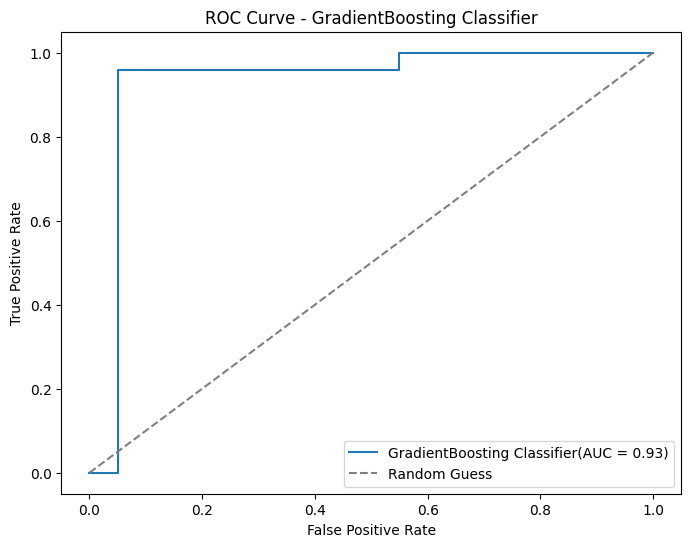


12-Fold Cross-Validation Scores:
[0.86666667 0.93333333 0.8        0.73333333 0.66666667 0.86666667
 0.86666667 0.73333333 0.73333333 0.66666667 0.6        0.78571429]

Cross-Validation Accuracy Score: 93.33%


In [437]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))
fun(GBclassifier,'GradientBoosting Classifier', 12,5)

In [439]:
compare = pd.DataFrame({'Model': ['Random Forest','Extra Trees Classifier','Logistic Regression', 'K Neighbors', 'Decision Tree',
                                   'Gradient Boost'],
                        'Accuracy': [RFAcc*100,ETAcc*100,LRAcc*100, KNAcc*100,
                                     DTAcc*100,  GBAcc*100],
                        'Training Accuracy':Training_Accuracy_L,
                        'Test Accuracy':Test_Accuracy_L,
                        'Sensitivity':Sensitivity_L,
                        'Specificity':Specificity_L,
                        'F1 Score':F1Score_L,
                        'Precision':Precision_L,
                        'Negative Predictive Value':Negative_Predictive_Value_L,
                        'False Negative Rate':False_Negative_Rate_L,
                        'False Positive Rate':False_Positive_Rate_L,
                        'False Discovery Rate':False_Discovery_Rate_L,
                        'False Omission Rate':False_Omission_Rate_L,
                        'cv-accuracy score':cv_accuracy_L,
                        })
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Training Accuracy,Test Accuracy,Sensitivity,Specificity,F1 Score,Precision,Negative Predictive Value,False Negative Rate,False Positive Rate,False Discovery Rate,False Omission Rate,cv-accuracy score
0,Random Forest,95.555556,98.325,95.556,0.96,0.95,0.960,0.960,0.950,0.04,0.05,0.040,0.050,92.307692
5,Gradient Boost,93.333333,100.000,93.334,0.92,0.95,0.939,0.959,0.905,0.08,0.05,0.042,0.096,93.333333
1,Extra Trees Classifier,91.111111,92.179,91.112,0.96,0.85,0.924,0.889,0.945,0.04,0.15,0.112,0.056,90.000000
4,Decision Tree,88.888889,93.855,88.889,0.92,0.85,0.902,0.885,0.895,0.08,0.15,0.116,0.106,80.000000
2,Logistic Regression,82.222222,79.330,82.223,0.76,0.90,0.827,0.905,0.750,0.24,0.10,0.096,0.250,91.666667
3,K Neighbors,80.000000,70.950,60.000,0.40,0.85,0.527,0.770,0.532,0.60,0.15,0.231,0.469,90.909091


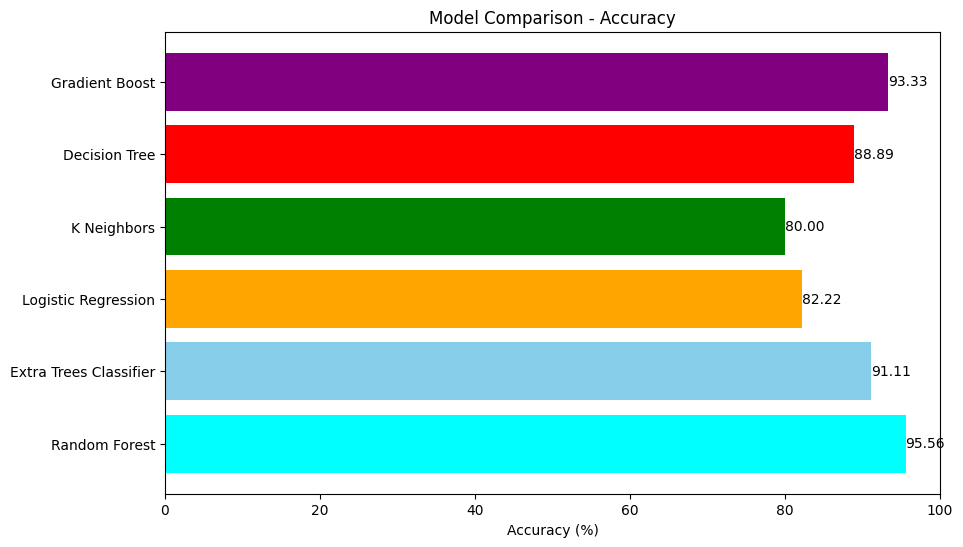

In [440]:
colors = ['aqua','skyblue', 'orange', 'green', 'red', 'purple', 'pink']
plt.figure(figsize=(10, 6))
plt.barh(compare['Model'], compare['Accuracy'], color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 100)
for index, value in enumerate(compare['Accuracy']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

plt.show()


In [441]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


voting_clf = VotingClassifier(estimators=[('randf', RFclassifier), ('extra', ETclassifier), ('pgb', GBclassifier)], voting='hard')

voting_clf.fit(X_train, y_train)

ensemble_prediction = voting_clf.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)
print("Accuracy - Voting Ensemble:", ensemble_accuracy*100)
num_folds=13
kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=kf, scoring='accuracy')
print(f"\n{num_folds}-Fold Cross-Validation Scores:")
print(cv_scores)

print(f"\nCross-Validation Accuracy Score: {max(cv_scores) * 100:.2f}%")
cv_accuracy_L.append(max(cv_scores)*100)

Accuracy - Voting Ensemble: 95.55555555555556

13-Fold Cross-Validation Scores:
[0.85714286 0.92857143 0.85714286 0.78571429 0.71428571 0.85714286
 0.92857143 0.78571429 0.71428571 0.71428571 0.84615385 0.69230769
 0.92307692]

Cross-Validation Accuracy Score: 92.86%


In [442]:
import joblib
joblib.dump(voting_clf, "mymodel_ensemble.pkl")


['mymodel_ensemble.pkl']